In [39]:
from google.colab import drive

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)    

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [44]:
cd /content/drive/My\ Drive/Masters/Deep\ Learning/PyTorch-Notebooks/PyTorch-Notebooks

/content/drive/My Drive/Masters/Deep Learning/PyTorch-Notebooks/PyTorch-Notebooks


In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!




/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
import cv2

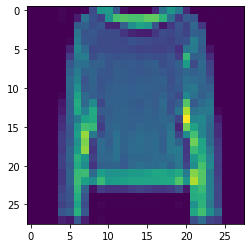

In [3]:
import matplotlib.pyplot as plt
images,label = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze())

In [0]:
#building a network
from torch import nn,optim
import torch.nn.functional as F
import datetime

In [0]:
model = nn.Sequential(
                    nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1)
)
#defining the loss
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

In [6]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.003
    weight_decay: 0
)

In [0]:
def train_model(epochs,train_loader,model,criterion,optimizer,device = 'cpu',print_time_stats=True):
  train_start_time = datetime.datetime.now()
  model.train()
  for e in range(epochs):
    epoch_start_time = datetime.datetime.now()
    running_loss = 0
    for images,labels in train_loader:
      if device != 'cpu':
        images, labels = images.cuda(),labels.cuda()
      images = images.view(-1,28*28)
      optimizer.zero_grad()
      output = model(images)
      loss = criterion(output,labels)
      loss.backward()
      optimizer.step()
      running_loss += loss
    print(f"Average Loss per Batch : {running_loss/len(train_loader)}")
    epoch_end_time = datetime.datetime.now()
    if print_time_stats:
      print(f"Epoch Time : {epoch_end_time - epoch_start_time}")
  train_end_time = datetime.datetime.now()
  if print_time_stats:
    print(f"Training Time : {train_end_time - train_start_time}")

In [0]:
model
%config IPCompleter.greedy=True

In [0]:
train_model(5,trainloader,model,criterion,optimizer)

Average Loss per Batch : 0.2907261848449707
Epoch Time : 0:00:11.836730
Average Loss per Batch : 0.2827276587486267
Epoch Time : 0:00:11.775026
Average Loss per Batch : 0.271436870098114
Epoch Time : 0:00:11.776301
Average Loss per Batch : 0.26913484930992126
Epoch Time : 0:00:11.727176
Average Loss per Batch : 0.2596645951271057
Epoch Time : 0:00:11.612741
Training Time : 0:00:58.728374


In [0]:
#training the network
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        output = model(images)
        loss = criterion(output,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+= loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
#after the completion of the for loop it goes to the else block

Training loss: 0.5000063580458861
Training loss: 0.3840057188069134
Training loss: 0.34913164706054783
Training loss: 0.32833954662497616
Training loss: 0.31627746233776177


Predicted score for correct label : 0.987906813621521


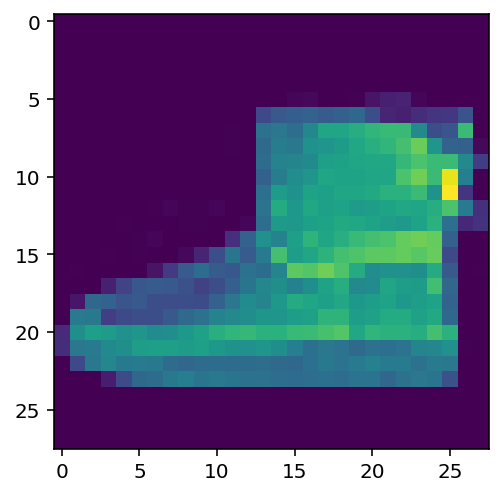

In [0]:
#plotting the results
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


dataiter = iter(testloader)
images,labels = dataiter.next()
img = images[0]
plt.imshow(img.numpy().squeeze())
img = img.view(img.shape[0],-1)
#as we used log soft max so the porbability calculation
model.eval()
ps = torch.exp(model(img))

print(f"Predicted score for correct label : {ps[0][labels[0]].item()}")

# Model Evaluator Class

TODO:

1. Decide the information you want to store
2. Add methods to store and retrive the information
3. Add methods to print the information
4. Add methods to visualize between the models

In [0]:
parameter_dict = {"epochs":5,"batch_size":64,"model":model,"device":"cpu"}
model_stats = [{"model 1":{"parameters":parameter_dict,"epoch_timings":[11.78,11.70,11.78,11.86,11.79],"train_time":58.93,"avg_loss_per_batch":[0.3849,0.350,0.325,0.311,0.299]}}]

In [0]:
class ModelEvaluator:
  def __init__(self,dataset):
    self.dataset = dataset
    self.models = {}

  def load_model(self,file_path):
    try:
      self.models = torch.load(file_path)
      print("Model Successfully loaded")
    except:
      print("Model Dict Not Found")

  def save_model(self,models,file_path):
    torch.save(models,file_path)

  def add_model(self,model):
    self.models.append(model)

In [0]:
fashion_mnist = ModelEvaluator('fashion_mnist')
path = "/content/drive/My Drive/Masters/Deep Learning/PyTorch-Notebooks/PyTorch-Notebooks/fashion_mnist_test.pkl"

In [0]:
fashion_mnist.save_model(model_stats,open(path,'wb'))

In [100]:
model_stats

[{'model 1': {'avg_loss_per_batch': [0.3849, 0.35, 0.325, 0.311, 0.299],
   'epoch_timings': [11.78, 11.7, 11.78, 11.86, 11.79],
   'parameters': {'batch_size': 64,
    'device': 'cpu',
    'epochs': 5,
    'model': Sequential(
      (0): Linear(in_features=784, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=10, bias=True)
      (5): LogSoftmax()
    )},
   'train_time': 58.93}}]

In [101]:
fashion_mnist.load_model(path)

Model Successfully loaded


In [102]:
fashion_mnist.models

[{'model 1': {'avg_loss_per_batch': [0.3849, 0.35, 0.325, 0.311, 0.299],
   'epoch_timings': [11.78, 11.7, 11.78, 11.86, 11.79],
   'parameters': {'batch_size': 64,
    'device': 'cpu',
    'epochs': 5,
    'model': Sequential(
      (0): Linear(in_features=784, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=10, bias=True)
      (5): LogSoftmax()
    )},
   'train_time': 58.93}}]